# **---------------**>**SOCIAL MEDIA SENTIMENT ANALYSIS PROJECT**<**---------------**

# Import Libraries and Set Up

In [1]:
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag
import nltk

# Download NLTK resources if not already available
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ENGHK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ENGHK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ENGHK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ENGHK\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Load & Merge Data

In [2]:

# Load the SQLite data
db_path = r"D:\# DATA SCIENCE\# PROJECTS\- PROJECTS INTERNSHIPS\TECHNOHACKS SOLUTIONS - DATA SCIENCE\Social Media Sentiment Analysis Project\data\database.sqlite"
conn = sqlite3.connect(db_path)
df_sqlite = pd.read_sql_query("SELECT * FROM Tweets", conn)
conn.close()

# Load the CSV data
csv_file_path = r"D:\# DATA SCIENCE\# PROJECTS\- PROJECTS INTERNSHIPS\TECHNOHACKS SOLUTIONS - DATA SCIENCE\Social Media Sentiment Analysis Project\data\Tweets.csv"
df_csv = pd.read_csv(csv_file_path)

# Merge the datasets on 'tweet_id'
merged_df = pd.merge(df_sqlite, df_csv, on='tweet_id', suffixes=('_sqlite', '_csv'))

print("Datasets Loaded and Merged:")
print(merged_df.head())

# Save the merged data to a CSV file
merged_df.to_csv(r"D:\# DATA SCIENCE\# PROJECTS\- PROJECTS INTERNSHIPS\TECHNOHACKS SOLUTIONS - DATA SCIENCE\Social Media Sentiment Analysis Project\merged_tweets_data.csv", index=False)
print("Merged dataset saved to 'merged_tweets_data.csv'")


Datasets Loaded and Merged:
             tweet_id airline_sentiment_sqlite  \
0  567588278875213824                  neutral   
1  567590027375702016                 negative   
2  567591480085463040                 negative   
3  567592368451248130                 negative   
4  567594449874587648                 negative   

   airline_sentiment_confidence_sqlite   negativereason_sqlite  \
0                                  1.0                           
1                                  1.0              Can't Tell   
2                                  1.0             Late Flight   
3                                  1.0             Late Flight   
4                                  1.0  Customer Service Issue   

  negativereason_confidence_sqlite airline_sqlite  \
0                                           Delta   
1                           0.6503          Delta   
2                            0.346         United   
3                                1         United   
4        

In [3]:
from IPython.display import display
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
display(merged_df.head())  # Display the first few rows of the merged DataFrame

,tweet_id,airline_sentiment_sqlite,airline_sentiment_confidence_sqlite,negativereason_sqlite,negativereason_confidence_sqlite,airline_sqlite,airline_sentiment_gold_sqlite,name_sqlite,negativereason_gold_sqlite,retweet_count_sqlite,text_sqlite,tweet_coord_sqlite,tweet_created_sqlite,tweet_location_sqlite,user_timezone_sqlite,airline_sentiment_csv,airline_sentiment_confidence_csv,negativereason_csv,negativereason_confidence_csv,airline_csv,airline_sentiment_gold_csv,name_csv,negativereason_gold_csv,retweet_count_csv,text_csv,tweet_coord_csv,tweet_created_csv,tweet_location_csv,user_timezone_csv
0,567588278875213824,neutral,1.0,,,Delta,,JetBlueNews,,0,@JetBlue's new CEO seeks the right balance to ...,,2015-02-16 23:36:05 -0800,USA,Sydney,neutral,1.0,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,@JetBlue's new CEO seeks the right balance to ...,NaN,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,,nesi_1992,,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada),negative,1.0,Can't Tell,0.6503,Delta,NaN,nesi_1992,NaN,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,NaN,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.346,United,,CPoutloud,,0,@united yes. We waited in line for almost an h...,,2015-02-16 23:48:48 -0800,"Washington, DC",,negative,1.0,Late Flight,0.3460,United,NaN,CPoutloud,NaN,0,@united yes. We waited in line for almost an h...,NaN,2015-02-16 23:48:48 -0800,"Washington, DC",NaN
3,567592368451248130,negative,1.0,Late Flight,1,United,,brenduch,,0,@united the we got into the gate at IAH on tim...,,2015-02-16 23:52:20 -0800,,Buenos Aires,negative,1.0,Late Flight,1.0000,United,NaN,brenduch,NaN,0,@united the we got into the gate at IAH on tim...,NaN,2015-02-16 23:52:20 -0800,NaN,Buenos Aires
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,,VahidESQ,,0,@SouthwestAir its cool that my bags take a bit...,,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada),negative,1.0,Customer Service Issue,0.3451,Southwest,NaN,VahidESQ,NaN,0,@SouthwestAir its cool that my bags take a bit...,NaN,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


# Data Cleaning and Preprocessing

In [4]:
# Drop duplicates if any
merged_df.drop_duplicates(inplace=True)

# Handling missing values based on the proportion of missing values in each column
threshold = 0.1  # Threshold for filling or dropping (10% missing)
for column in merged_df.columns:
    missing_ratio = merged_df[column].isnull().mean()
    if missing_ratio > threshold:
        if merged_df[column].dtype == 'object':
            merged_df[column].fillna('Unknown', inplace=True)
        else:
            merged_df[column].fillna(merged_df[column].mean(), inplace=True)
        print(f"Filling missing values in column: {column} (Missing Ratio: {missing_ratio:.2%})")
    elif 0 < missing_ratio <= threshold:
        merged_df.dropna(subset=[column], inplace=True)
        print(f"Dropping rows with missing values in column: {column} (Missing Ratio: {missing_ratio:.2%})")

# Convert datetime columns to proper datetime format
merged_df['tweet_created_sqlite'] = pd.to_datetime(merged_df['tweet_created_sqlite'], errors='coerce')

# Drop unnecessary columns if they exist
columns_to_drop = ['tweet_coord_sqlite', 'tweet_coord_csv']
merged_df.drop(columns=[col for col in columns_to_drop if col in merged_df.columns], errors='ignore', inplace=True)


Filling missing values in column: negativereason_csv (Missing Ratio: 37.28%)
Filling missing values in column: negativereason_confidence_csv (Missing Ratio: 28.08%)
Filling missing values in column: airline_sentiment_gold_csv (Missing Ratio: 99.73%)
Filling missing values in column: negativereason_gold_csv (Missing Ratio: 99.78%)
Filling missing values in column: tweet_coord_csv (Missing Ratio: 93.05%)
Filling missing values in column: tweet_location_csv (Missing Ratio: 32.34%)
Filling missing values in column: user_timezone_csv (Missing Ratio: 32.96%)


# Exploratory Data Analysis and Visualization

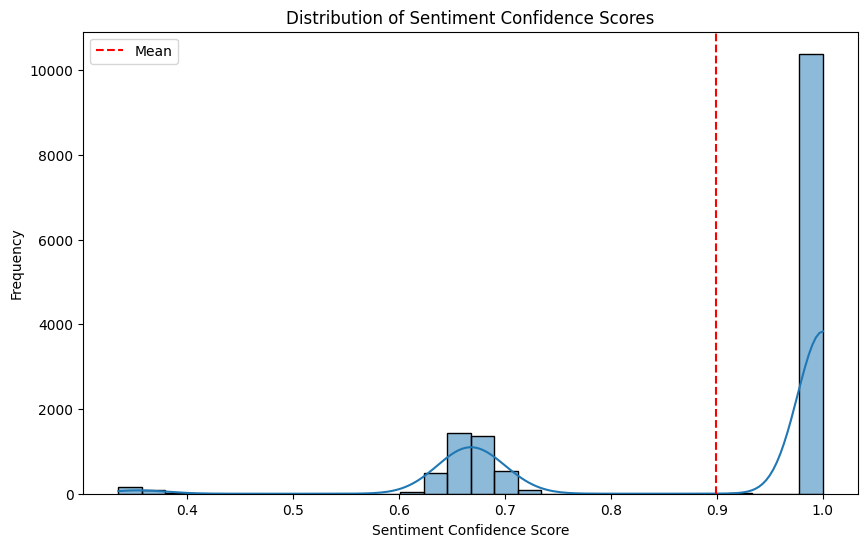

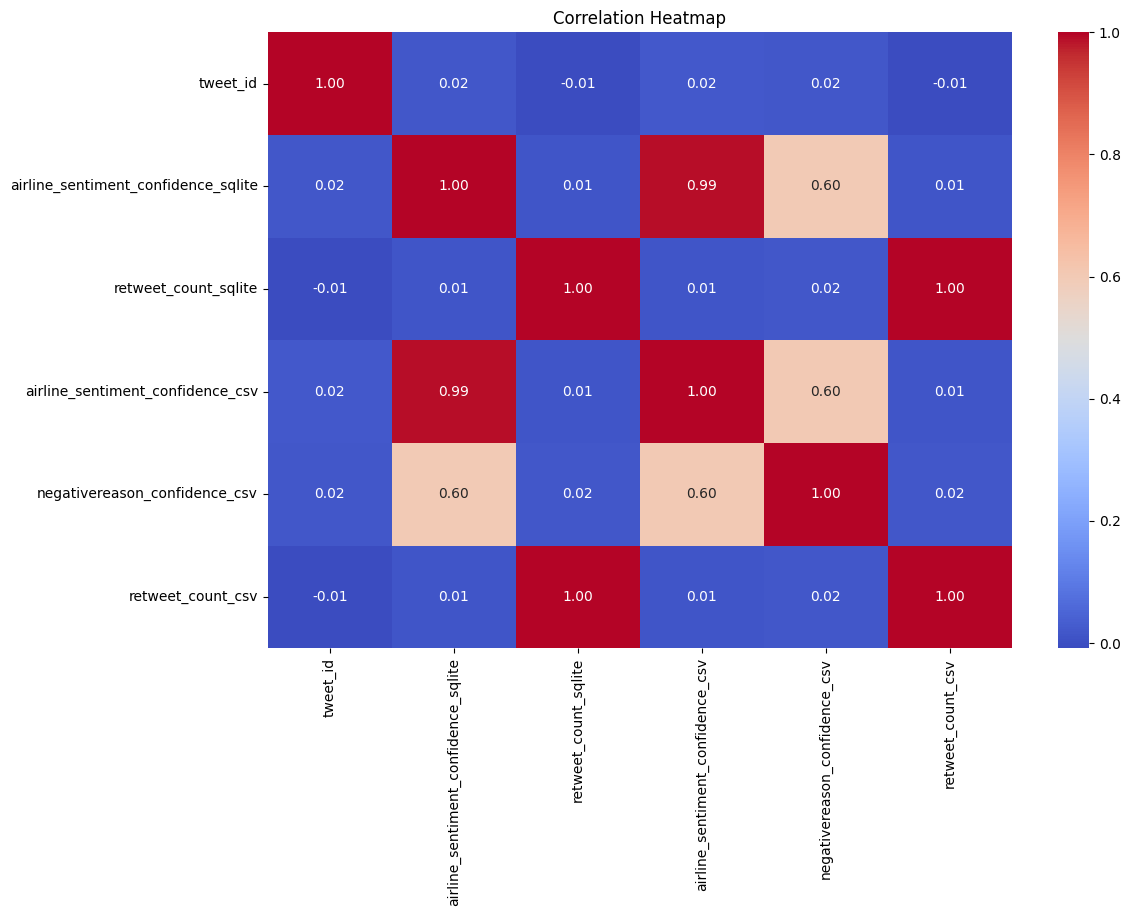

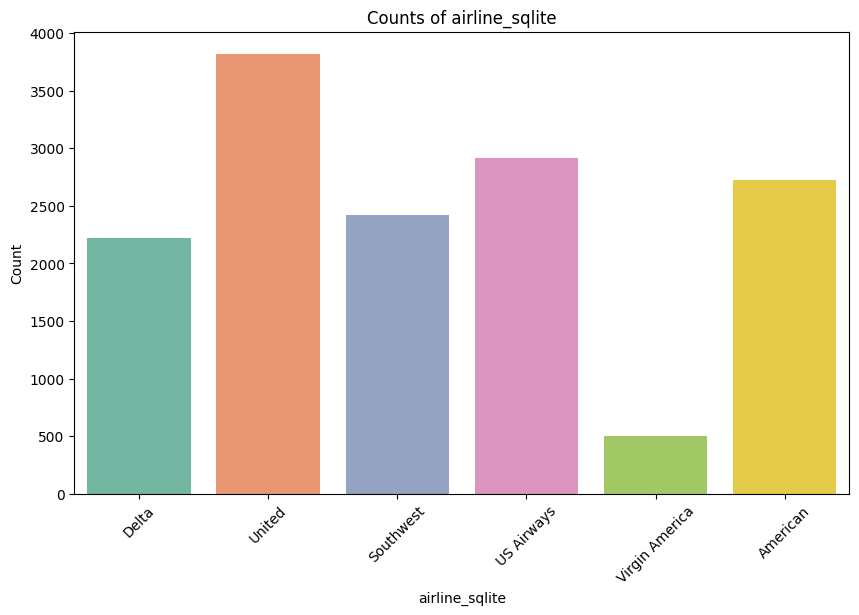

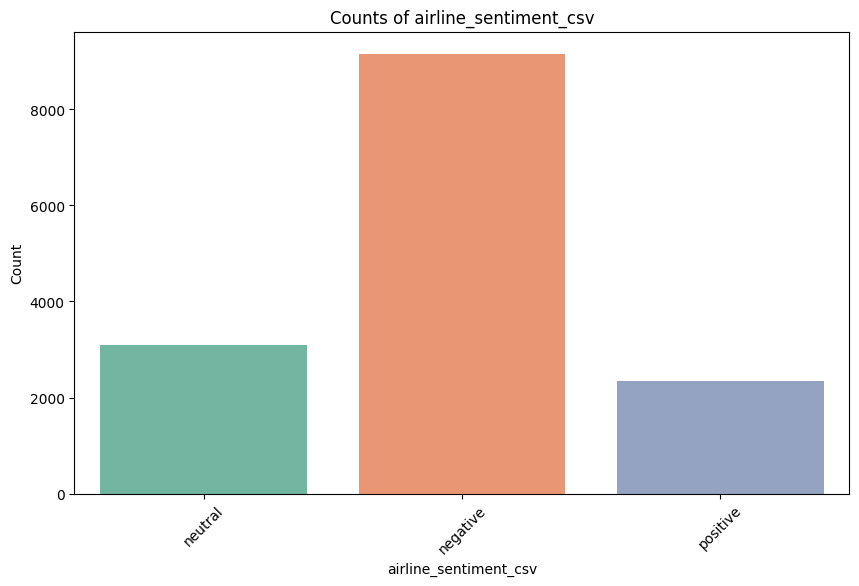

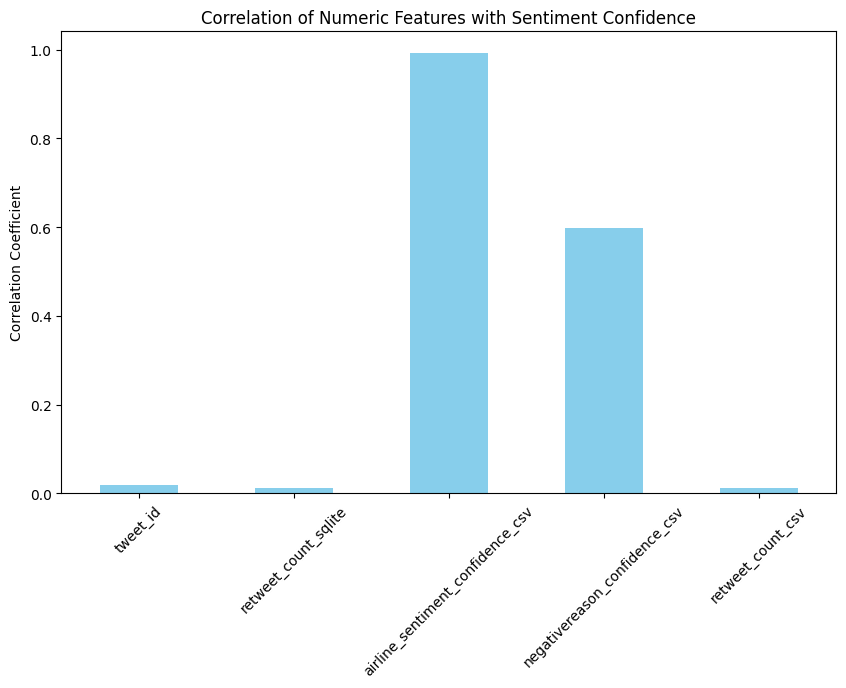

In [5]:
# Distribution of Sentiment Scores
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['airline_sentiment_confidence_sqlite'], bins=30, kde=True)
plt.title('Distribution of Sentiment Confidence Scores')
plt.xlabel('Sentiment Confidence Score')
plt.ylabel('Frequency')
plt.axvline(merged_df['airline_sentiment_confidence_sqlite'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

# Heatmap of Correlation
plt.figure(figsize=(12, 8))
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns
corr = merged_df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Bar Plot of Categorical Variables
categorical_cols = ['airline_sqlite', 'airline_sentiment_csv']  # Adjust these columns as needed
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=merged_df, x=col, palette='Set2')
    plt.title(f'Counts of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Correlation Bar Plot
correlation = merged_df[numeric_cols].corr()['airline_sentiment_confidence_sqlite'].drop('airline_sentiment_confidence_sqlite')
plt.figure(figsize=(10, 6))
correlation.plot(kind='bar', color='skyblue')
plt.title('Correlation of Numeric Features with Sentiment Confidence')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()


# Feature Selection and Engineering

In [6]:
features = ['airline_sentiment_confidence_sqlite', 'retweet_count_sqlite', 'negativereason_confidence_sqlite']
X = merged_df[features].copy()  # Use copy to avoid SettingWithCopyWarning
y = merged_df['airline_sentiment_csv'].map({'negative': 0, 'neutral': 1, 'positive': 2})  # Ensure these labels match your data

# Feature Engineering: Creating new features (e.g., length of tweets)
merged_df['text_length'] = merged_df['text_sqlite'].apply(len)
X['text_length'] = merged_df['text_length']


# Text Preprocessing

In [7]:
# Tokenization
merged_df['tokenized_text'] = merged_df['text_sqlite'].apply(word_tokenize)

# Stop Word Removal
stop_words = set(stopwords.words('english'))
merged_df['filtered_text'] = merged_df['tokenized_text'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

# Stemming
stemmer = PorterStemmer()
merged_df['stemmed_text'] = merged_df['filtered_text'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])

# Lemmatization
lemmatizer = WordNetLemmatizer()
merged_df['lemmatized_text'] = merged_df['filtered_text'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

# POS Tagging
merged_df['pos_tags'] = merged_df['filtered_text'].apply(lambda tokens: pos_tag(tokens))

# Convert stemmed and lemmatized text back to string for further analysis or modeling
merged_df['stemmed_text'] = merged_df['stemmed_text'].apply(' '.join)
merged_df['lemmatized_text'] = merged_df['lemmatized_text'].apply(' '.join)


# Handle Missing Values and Split Data

In [8]:
# Handle missing values in the feature set
X = X.apply(pd.to_numeric, errors='coerce').dropna()  # Convert to numeric and drop NaNs

# Step 5: Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y[X.index], test_size=0.3, random_state=42)


# Model Training

In [9]:
# Step 6: Initialize and train a RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model Training Completed")


Model Training Completed


# Model Evaluation

In [10]:
# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%\n")  # Display accuracy in percentage

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
target_names = ['Negative', 'Neutral', 'Positive']
class_report = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:")
print(class_report)


Model Accuracy: 96.19%

Confusion Matrix:
[[2735    1    0]
 [   1  283   31]
 [   1   86   13]]
Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      2736
     Neutral       0.76      0.90      0.83       315
    Positive       0.30      0.13      0.18       100

    accuracy                           0.96      3151
   macro avg       0.69      0.68      0.67      3151
weighted avg       0.95      0.96      0.96      3151



# Hyperparameter Tuning

In [11]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None]
}

# GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Re-evaluate with the best estimator
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Improved Accuracy: {accuracy_best * 100:.2f}%")  # Display improved accuracy in percentage


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Improved Accuracy: 96.64%


# Save the Model

In [12]:
# Save the Model
import joblib
joblib.dump(best_model, 'sentiment_model.pkl')
print("Model saved to sentiment_model.pkl")

Model saved to sentiment_model.pkl


# Visualize Sentiment Distribution

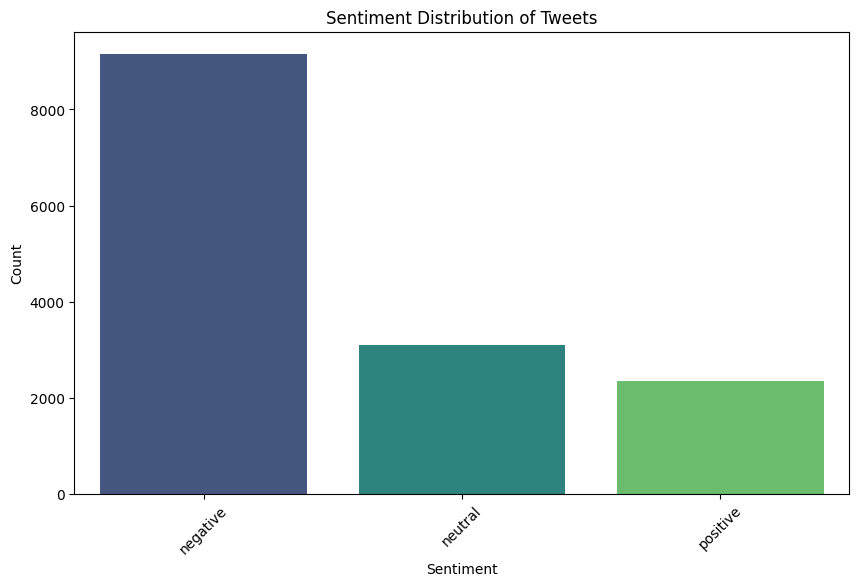

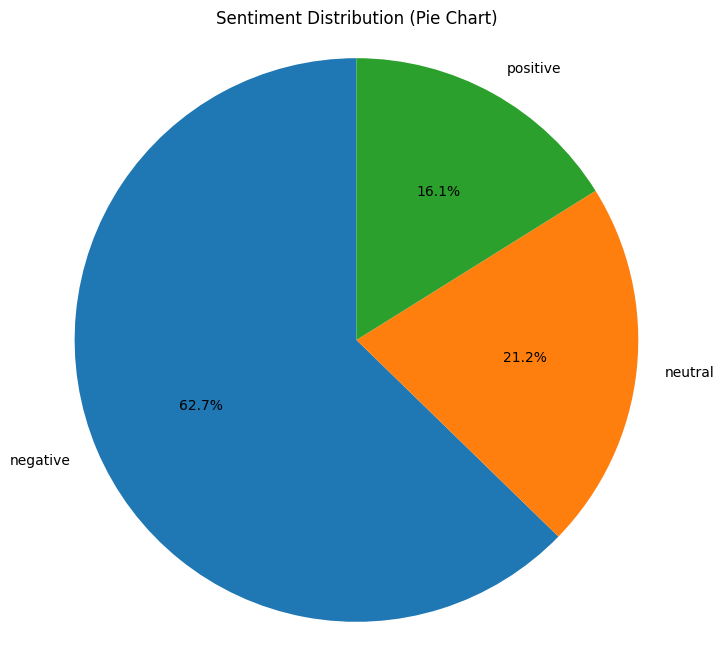

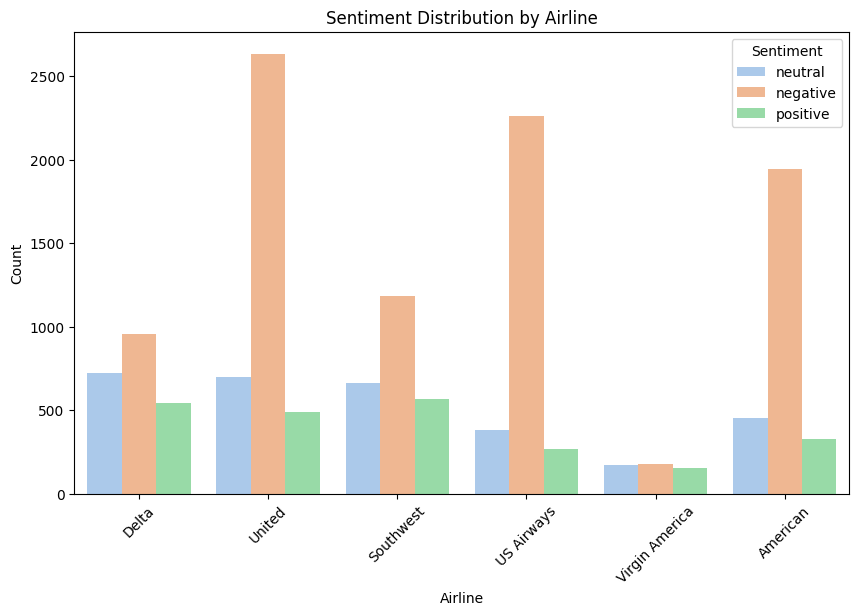

In [13]:
# Visualize Sentiment Distribution
plt.figure(figsize=(10, 6))
sentiment_counts = merged_df['airline_sentiment_csv'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualize Sentiment Distribution (Pie Chart)
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Sentiment Distribution (Pie Chart)")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Visualize Sentiment Distribution by Airline
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='airline_sqlite', hue='airline_sentiment_csv', palette='pastel')
plt.title("Sentiment Distribution by Airline")
plt.xlabel("Airline")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()
